In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)




df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

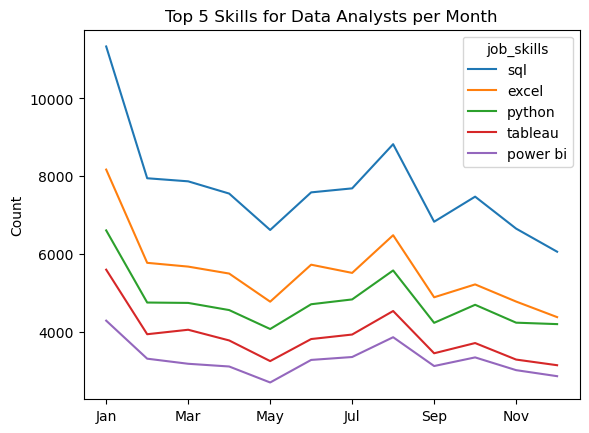

In [4]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

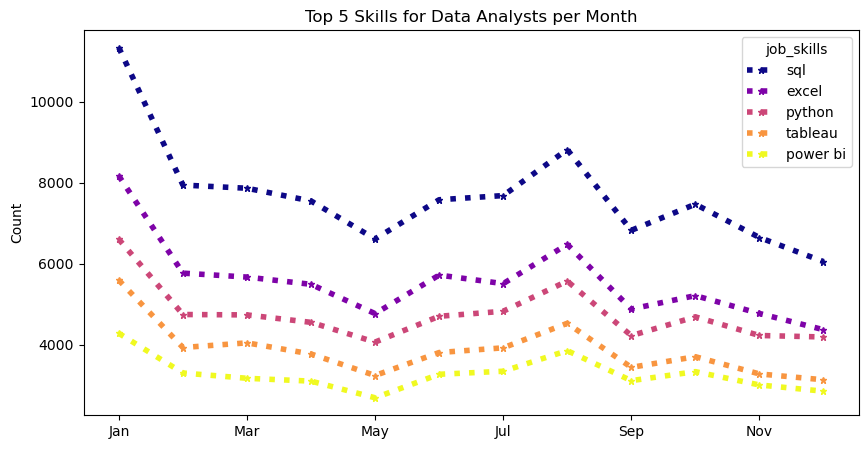

In [21]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options: '-', '--', '-.', ':'
    colormap='plasma', #hay más opciones, sólo debes ir al cheatsheets y buscas el que más te agrade (color)
    marker='*', #recuerda que hay más! el cheatsheet te dará toda la infomacion
    markersize=5, #este es para que ese marker que escogiste tenga un tamaño (tu se lo das y pueda resaltar. Cambiar el valor 5 por 10 si necesitas el ejemplo para saber que es)
    figsize=(10, 5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

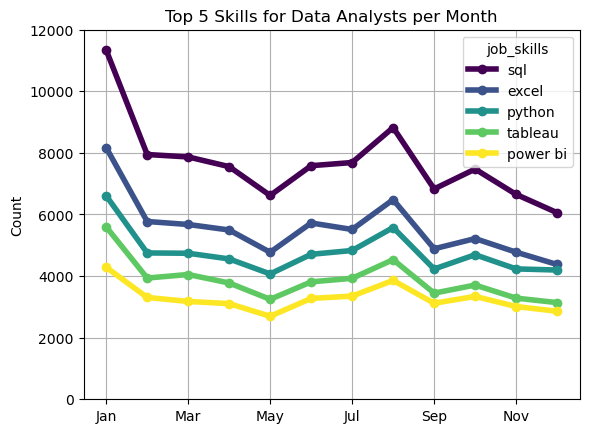

In [23]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=6,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True) #las lineas cuadradas

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000)
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [24]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

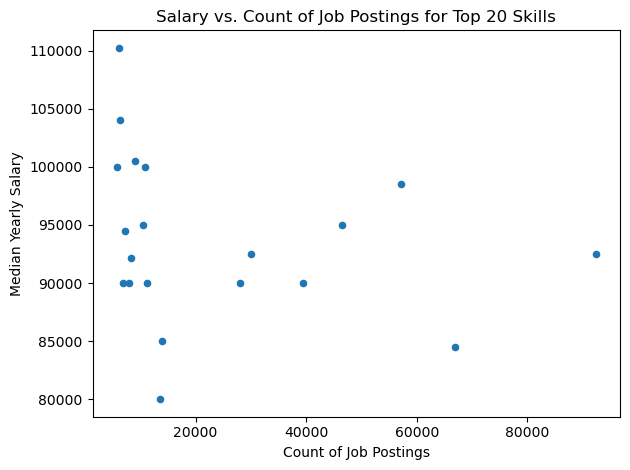

In [25]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

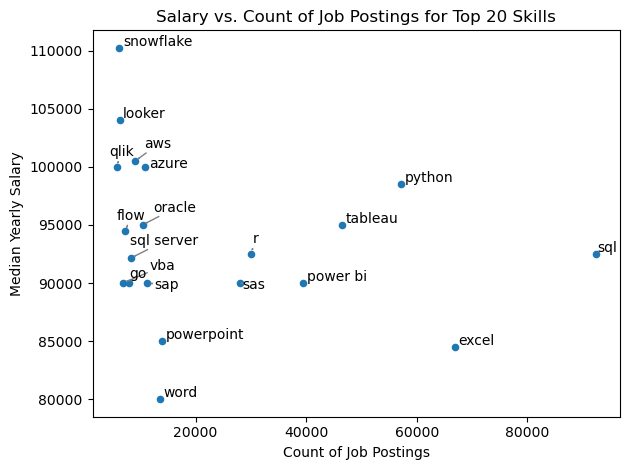

In [34]:
from adjustText import adjust_text


skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

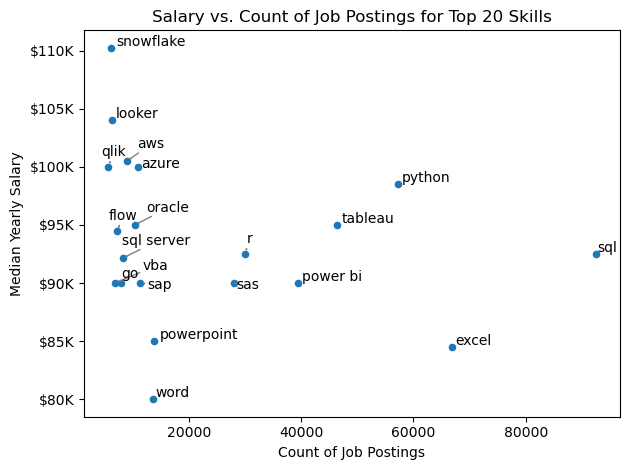

In [36]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.show()

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis. Es importante que sepas que puso int para que le diera un numero cerrado sin decimales. Si no colocas int, será un float y te dará numeros con decimales, ejemplo: 110000.00 (sin int)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

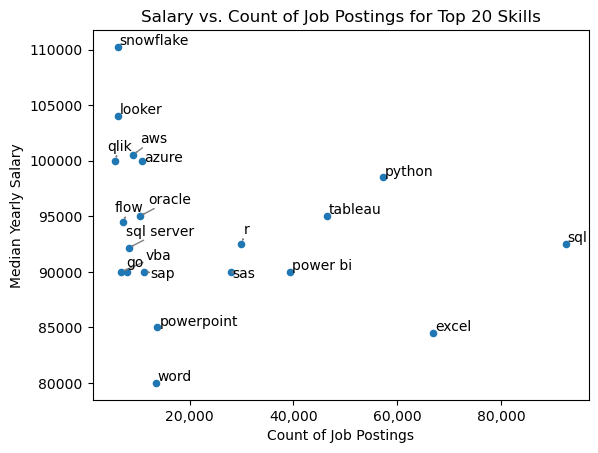

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot the scatter plot
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Add text annotations for each point
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

# Format the x-axis with commas
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()


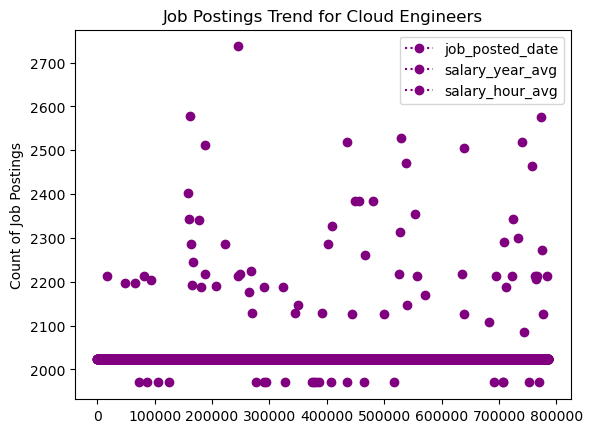

In [48]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
#df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M') 
#monthly_job_postings = df_ce.groupby('job_posted_month').size() 

# me faltaron las 2 segundas lineas en df_ce para que tomara de un periodo determinado y no me diera todos los puntos que me aparecen abajo

df_ce.plot(
    kind='line',
    color='purple',
    linestyle=':',
    marker='o'
)

plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

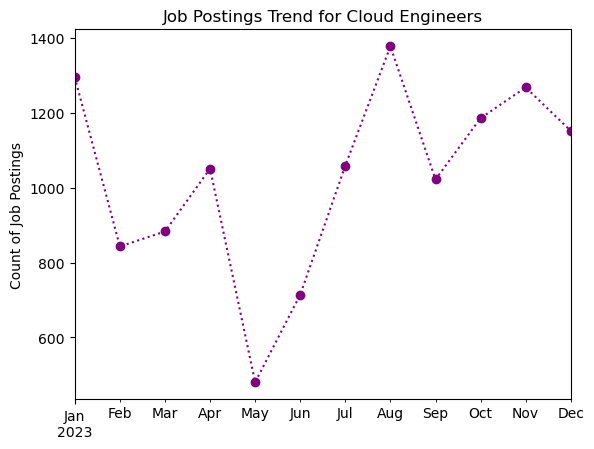

In [47]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()

monthly_job_postings.plot(
 kind='line', 
 linestyle=':', 
 color='purple', 
 marker='o'
 )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

In [5]:
sda_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
sda_df.dropna(subset=['salary_year_avg']).sort_values(by='salary_year_avg', ascending=False).head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
607922,Senior Data Analyst,"SVP, Data Analytics","Santa Monica, CA",via Ladders,Full-time,False,"California, United States",2023-06-22 09:01:01,False,True,United States,year,425000.0,NaN,The Walt Disney Company,None,None
259996,Senior Data Analyst,Sr. Oracle Database Analyst,"Springfield, VA",via Ladders,Full-time,False,"New York, United States",2023-05-18 06:59:59,False,True,United States,year,375000.0,NaN,General Dynamics,"[sql, postgresql, sql server, mysql, oracle, v...","{'cloud': ['oracle', 'vmware'], 'databases': [..."
65724,Senior Data Analyst,Senior Data Analyst SME,"Albuquerque, NM",via Ladders,Full-time,False,Sudan,2023-08-21 06:37:31,False,True,Sudan,year,375000.0,NaN,Modern Technology Solutions,None,None
275749,Senior Data Analyst,"Senior Director, Data","San Francisco, CA",via Ladders,Full-time,False,"California, United States",2023-06-30 07:01:13,False,True,United States,year,375000.0,NaN,"Tinder, Inc.",[go],{'programming': ['go']}
512792,Senior Data Analyst,Senior Data Analyst / Quant Analyst 1 yr Fixed...,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-04-12 10:59:55,True,False,United States,year,340000.0,NaN,Eden Smith Group,"[python, sql, hadoop, spark, airflow, yarn]","{'libraries': ['hadoop', 'spark', 'airflow'], ..."


In [2]:
sda_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
sda_df.dropna(subset=['salary_year_avg']).sort_values(by='salary_year_avg', ascending=False).head()
colors = ['blue', 'orange', 'green', 'red', 'purple']

sda_df.plot(
    kind='bar',
    color=colors,
    x='company_name',
    y='salary_year_avg'
)
plt.grid(True, axis='y', linestyle='--')

plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.ylabel('Number of Job Postings')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



KeyboardInterrupt: 

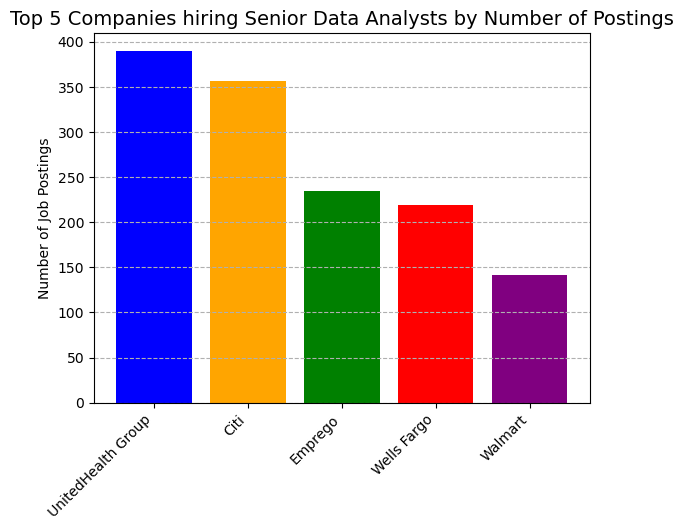

In [2]:
# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()